## Paso 1: Carga del conjunto de datos

In [19]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:/Users/Jaime/Desktop/EUROPEAN MARKET COLLEGE/clase1-minado/POBLACION/poblacion_andorra.csv')
dataframe.head()

,Fecha,Densidad,Hombres,Mujeres,Población
0,2022,174,41.975,39.613,81.588
1,2021,169,40.731,38.804,79.535
2,2020,166,39.740,38.275,78.015
3,2019,165,39.472,38.071,77.543
4,2018,162,38.789,37.388,76.177


In [20]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Fecha', 'Densidad', 'Hombres', 'Mujeres', 'Población']


## Paso 2: Realiza un EDA completo

In [21]:
# Obtener las dimensiones
dataframe.shape

(63, 5)

In [22]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha      63 non-null     int64  
 1   Densidad   63 non-null     int64  
 2   Hombres    63 non-null     float64
 3   Mujeres    63 non-null     float64
 4   Población  63 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 2.6 KB


In [23]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [24]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

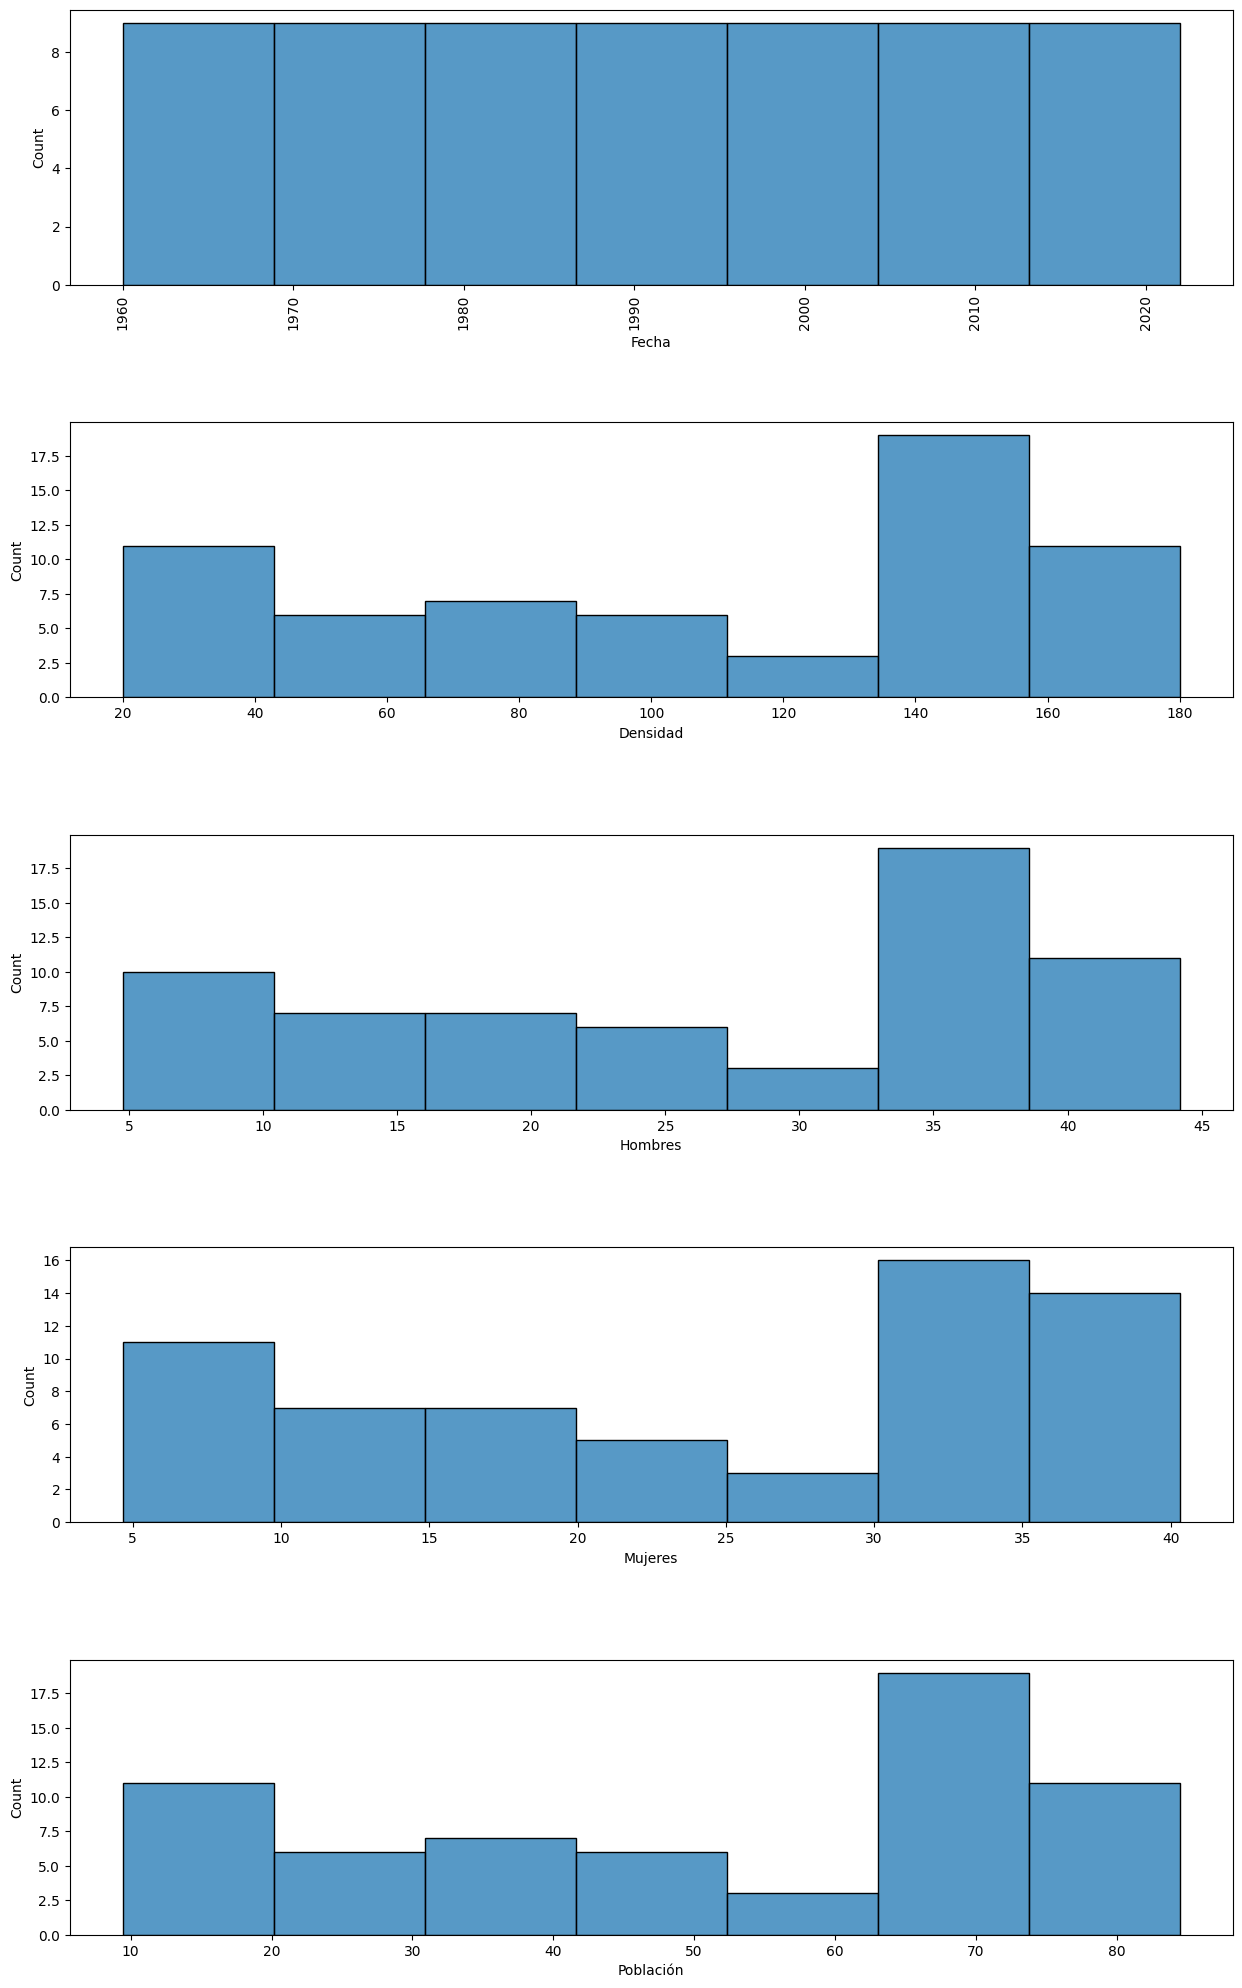

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(5, 1, figsize=(15, 25))  # Ajusta el tamaño del gráfico según tus necesidades

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='Fecha')
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[1], data=dataframe, x='Densidad')
sns.histplot(ax=axes[2], data=dataframe, x='Hombres')
sns.histplot(ax=axes[3], data=dataframe, x='Mujeres')
sns.histplot(ax=axes[4], data=dataframe, x='Población')

# Ajustar espacio entre subplots
plt.subplots_adjust(hspace=0.5)  # Aumenta el valor según sea necesario para agregar más espacio entre subgráficos

# Mostrar el gráfico
plt.show()


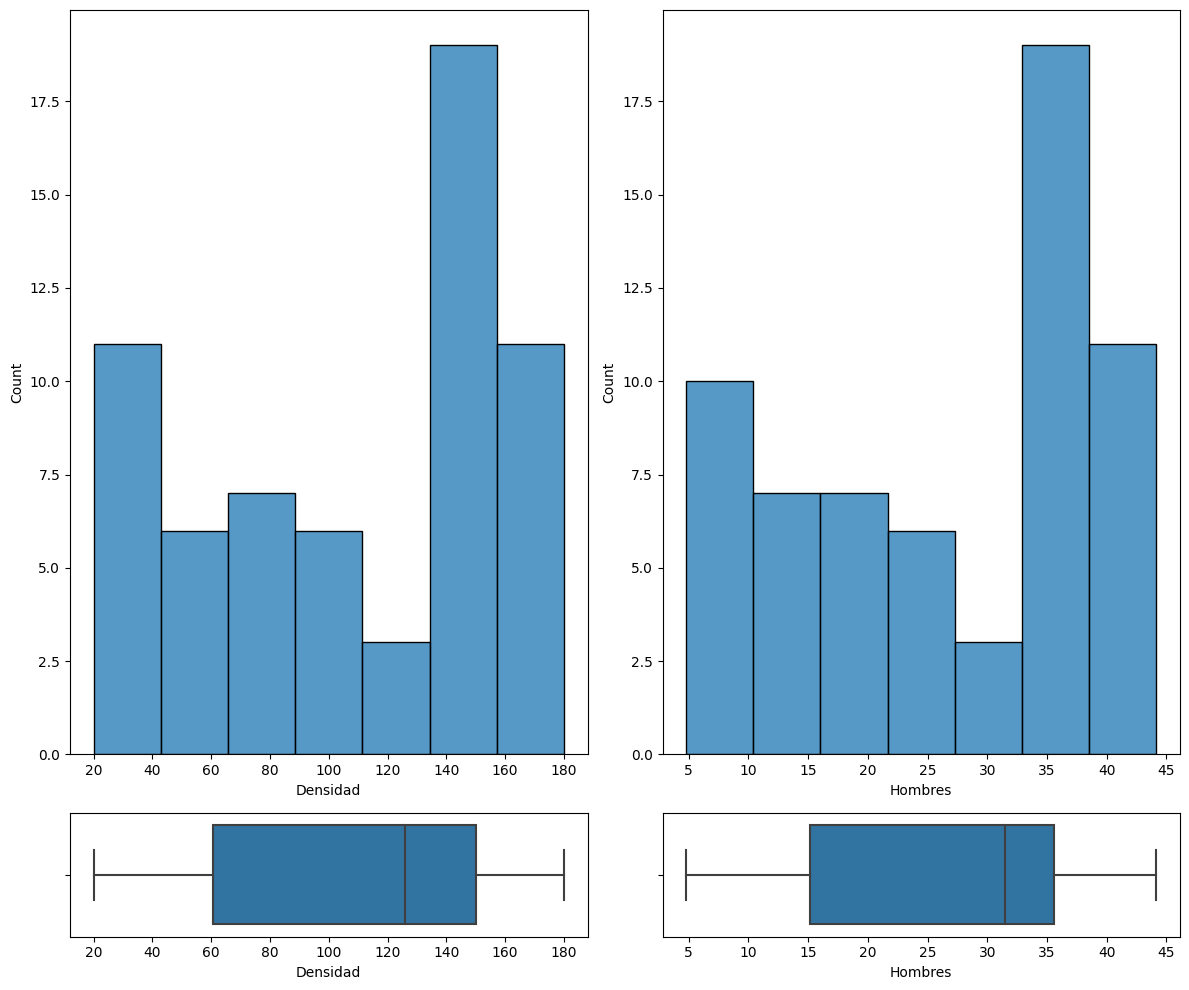

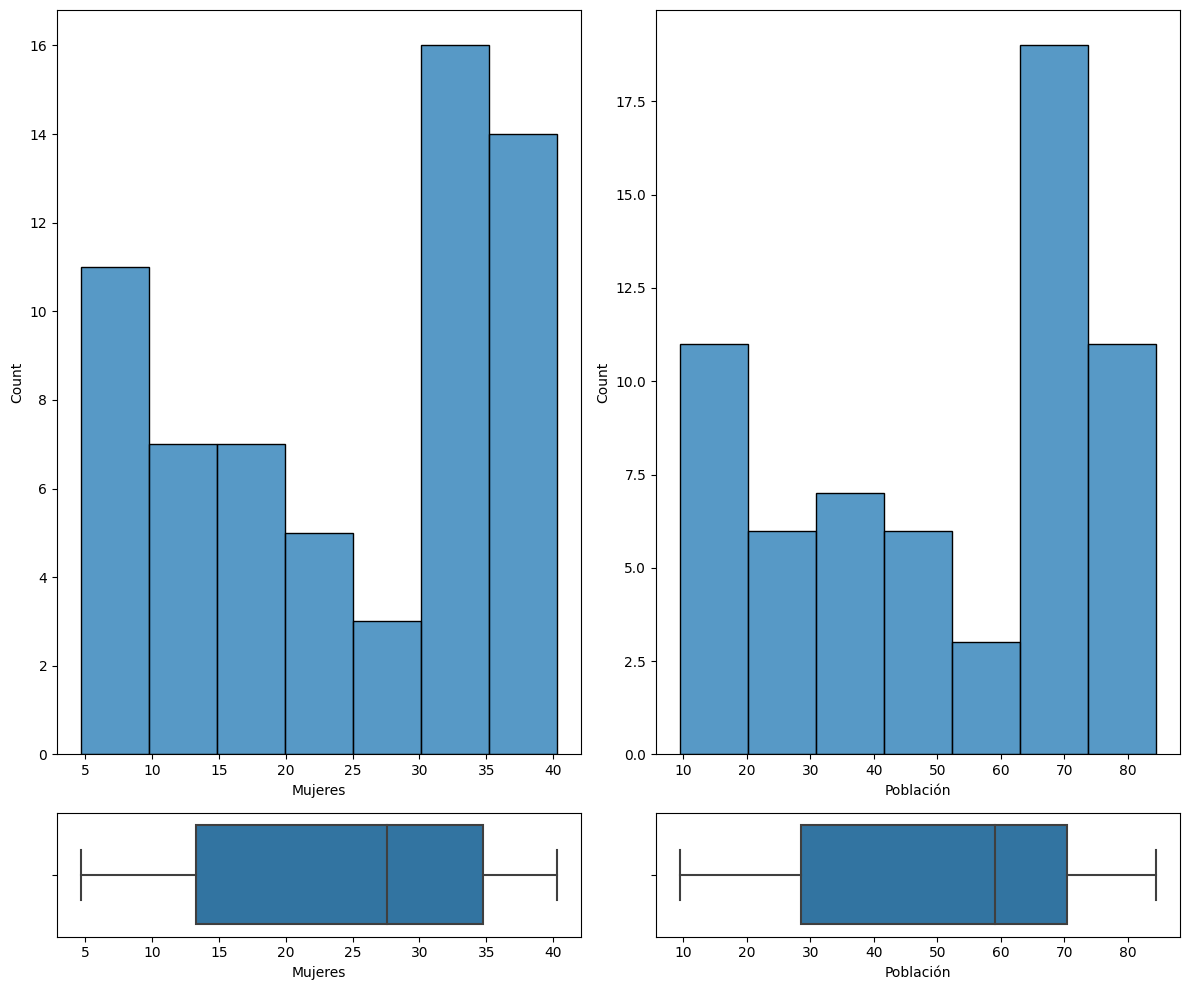

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 1]})

# Gráficos de la primera sección ('Densidad' y 'Hombres')
sns.histplot(ax=axis[0, 0], data=dataframe, x="Densidad")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Densidad")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Hombres")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Hombres")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Crear una nueva figura de subplots para las variables 'Mujeres' y 'Población'
fig, axis = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 1]})

# Gráficos de la segunda sección ('Mujeres' y 'Población')
sns.histplot(ax=axis[0, 0], data=dataframe, x="Mujeres")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="Mujeres")
sns.histplot(ax=axis[0, 1], data=dataframe, x="Población")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="Población")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


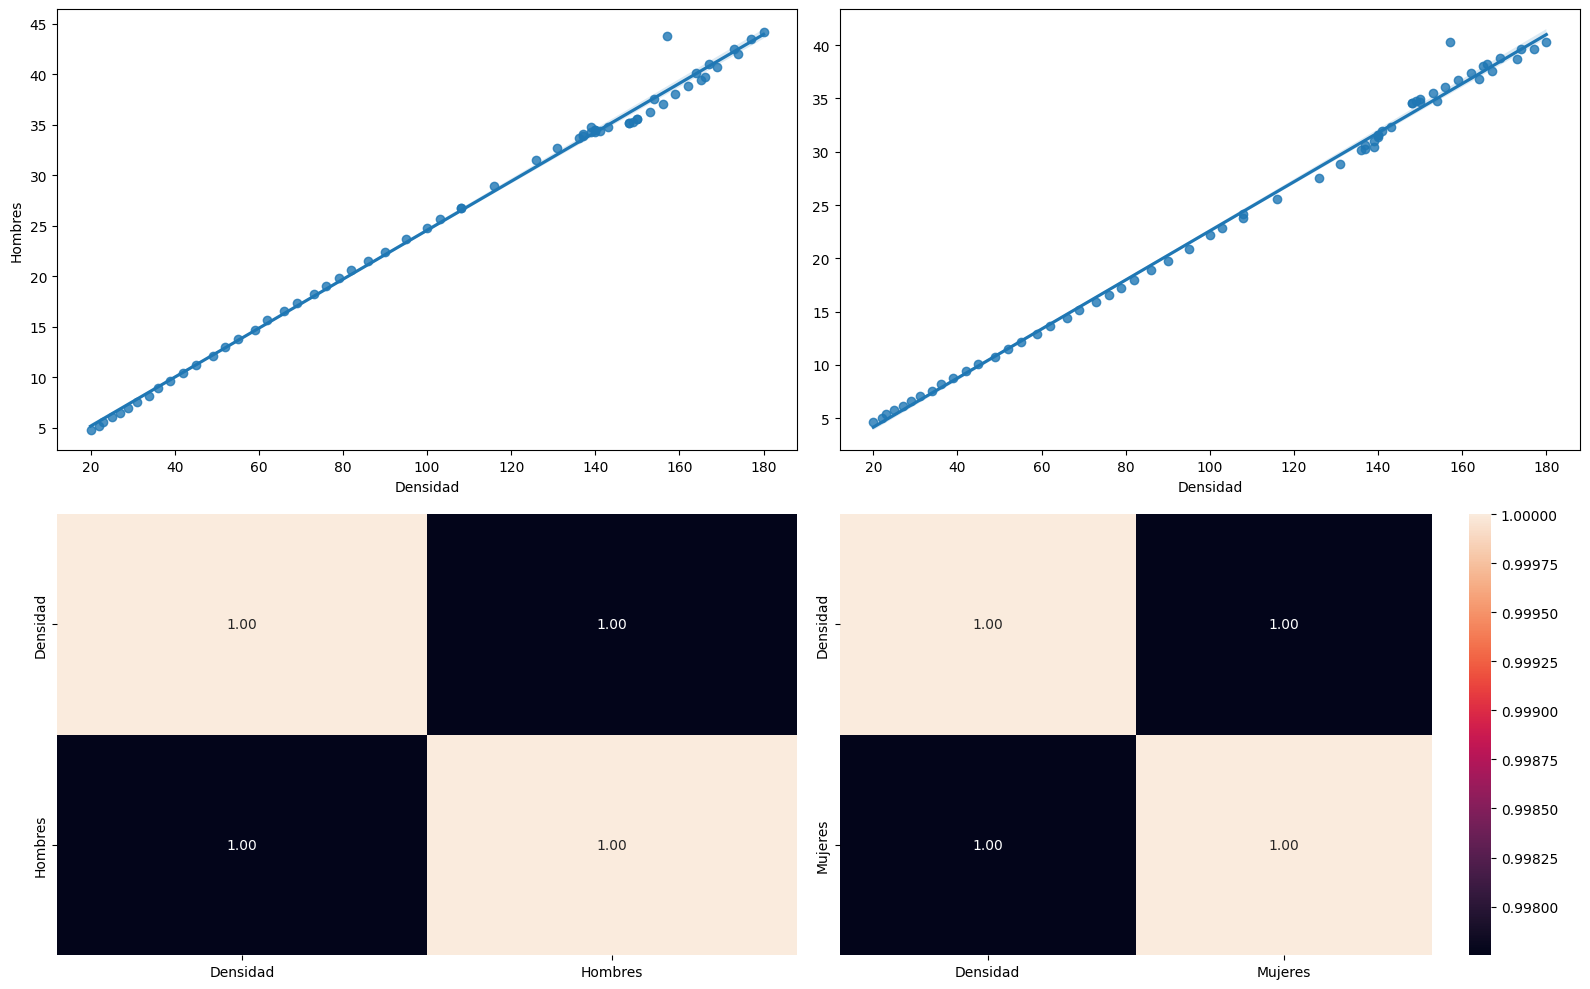

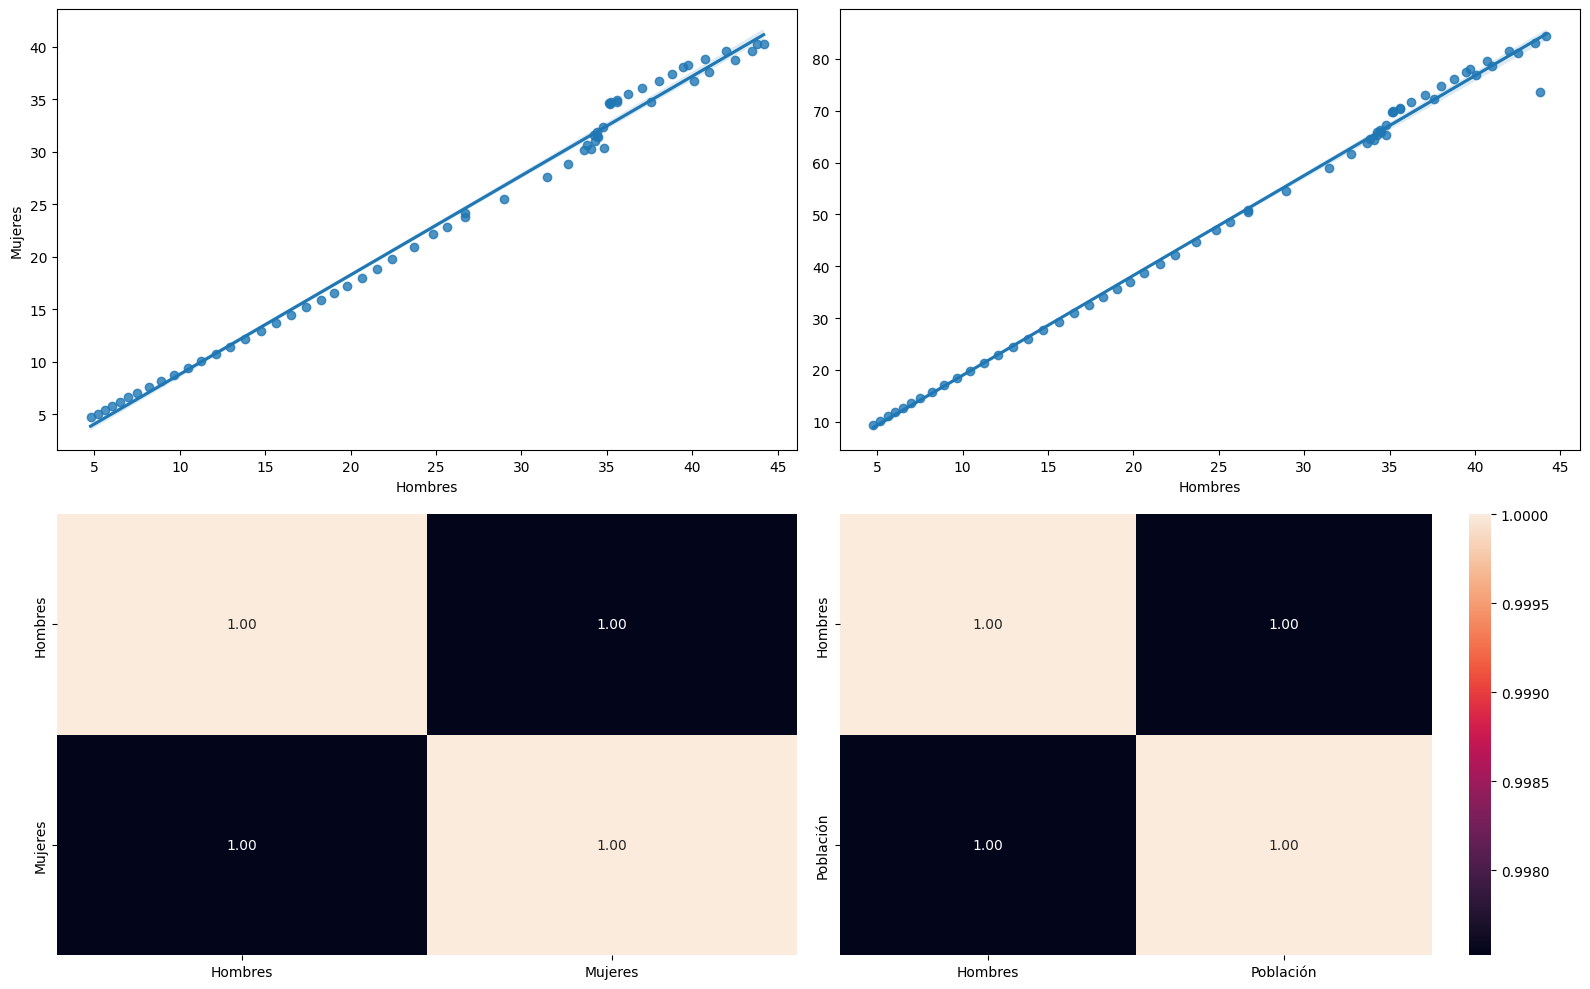

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de dispersión y correlación entre "Densidad" y "Hombres"
sns.regplot(ax=axis[0, 0], data=dataframe, x="Densidad", y="Hombres")
sns.heatmap(dataframe[["Densidad", "Hombres"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "Densidad" y "Mujeres"
sns.regplot(ax=axis[0, 1], data=dataframe, x="Densidad", y="Mujeres").set(ylabel=None)
sns.heatmap(dataframe[["Densidad", "Mujeres"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Crear una nueva figura de subplots para las variables "Hombres" y "Mujeres"
fig, axis = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico de dispersión y correlación entre "Hombres" y "Mujeres"
sns.regplot(ax=axis[0, 0], data=dataframe, x="Hombres", y="Mujeres")
sns.heatmap(dataframe[["Hombres", "Mujeres"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

# Gráfico de dispersión y correlación entre "Hombres" y "Población"
sns.regplot(ax=axis[0, 1], data=dataframe, x="Hombres", y="Población").set(ylabel=None)
sns.heatmap(dataframe[["Hombres", "Población"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


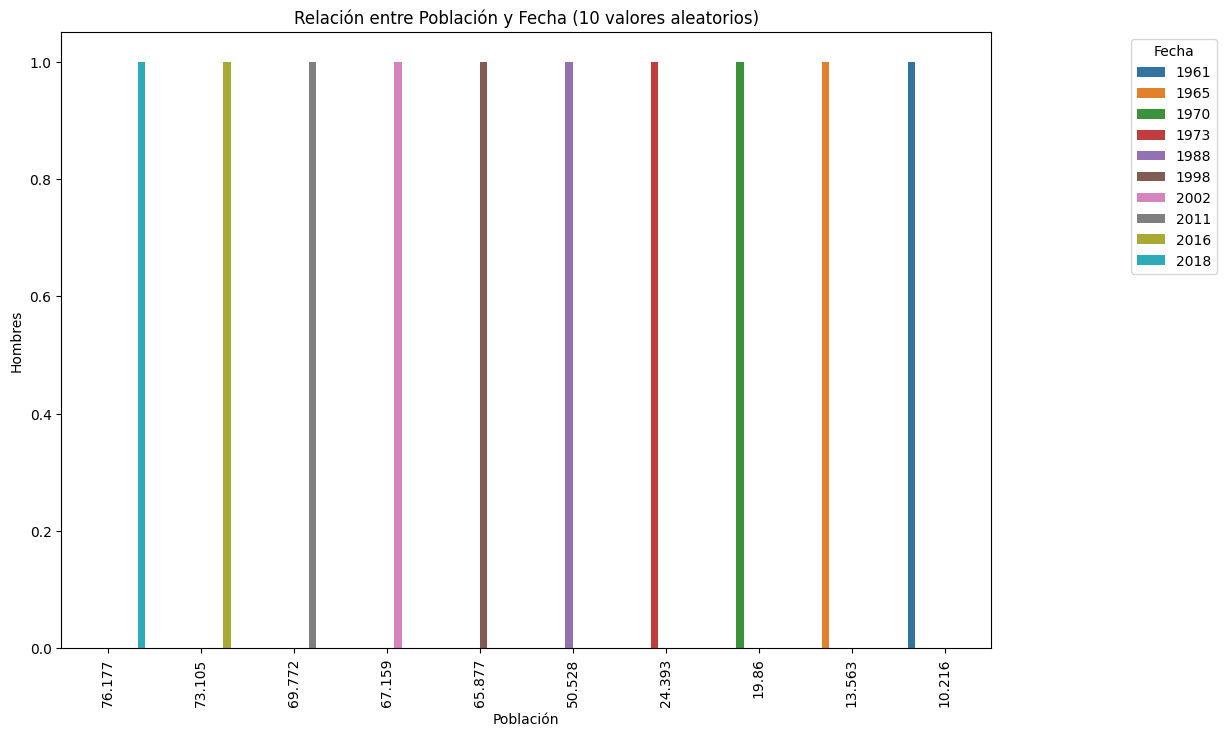

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Obtener 10 valores aleatorios para mostrar
random_dates = random.sample(list(dataframe['Fecha'].unique()), 10)

# Filtrar el DataFrame para incluir solo las filas con las fechas seleccionadas aleatoriamente
random_data = dataframe[dataframe['Fecha'].isin(random_dates)]

# Crear tablas de contingencia entre las variables categóricas
contingency_table_location_country = pd.crosstab(random_data['Fecha'], random_data['Población'])

# Crear gráfico de barras apiladas para 'Población' y 'Fecha' con el orden invertido
plt.figure(figsize=(12, 8))
sns.countplot(data=random_data, x='Población', hue='Fecha', order=random_data['Población'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Relación entre Población y Fecha (10 valores aleatorios)")
plt.xlabel("Población")
plt.ylabel("Hombres")  # Cambiar la etiqueta del eje y
plt.legend(title="Fecha", loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()


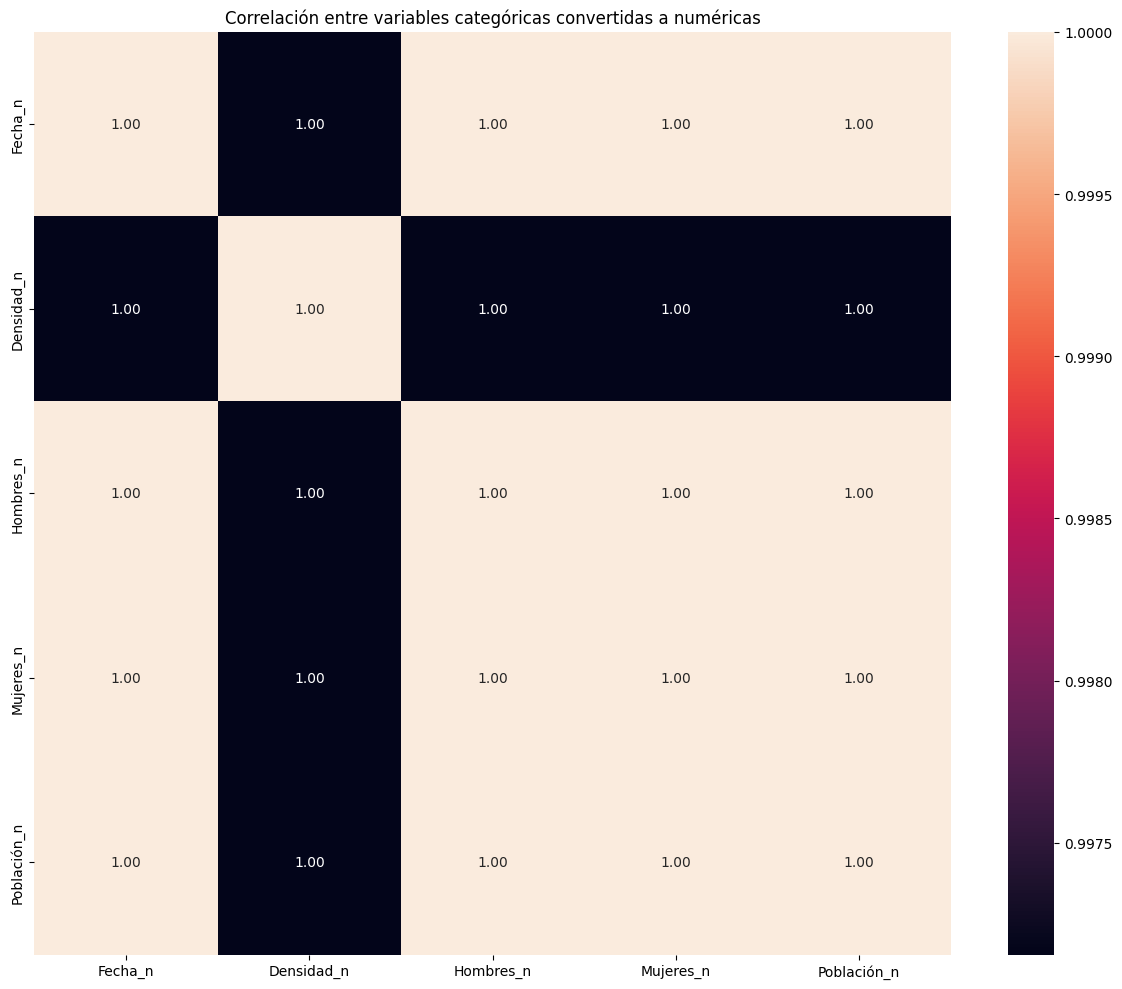

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame para evitar la SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Factorizar las columnas categóricas
dataframe_copy['Fecha_n'] = pd.factorize(dataframe_copy['Fecha'])[0]
dataframe_copy['Densidad_n'] = pd.factorize(dataframe_copy['Densidad'])[0]
dataframe_copy['Hombres_n'] = pd.factorize(dataframe_copy['Hombres'])[0]
dataframe_copy['Mujeres_n'] = pd.factorize(dataframe_copy['Mujeres'])[0]
dataframe_copy['Población_n'] = pd.factorize(dataframe_copy['Población'])[0]

# Plotear el mapa de calor de correlación
fig, axis = plt.subplots(figsize=(12, 10))
sns.heatmap(dataframe_copy[['Fecha_n', 'Densidad_n', 'Hombres_n', 'Mujeres_n', 'Población_n']].corr(), annot=True, fmt=".2f")
plt.title("Correlación entre variables categóricas convertidas a numéricas")
plt.tight_layout()
plt.show()


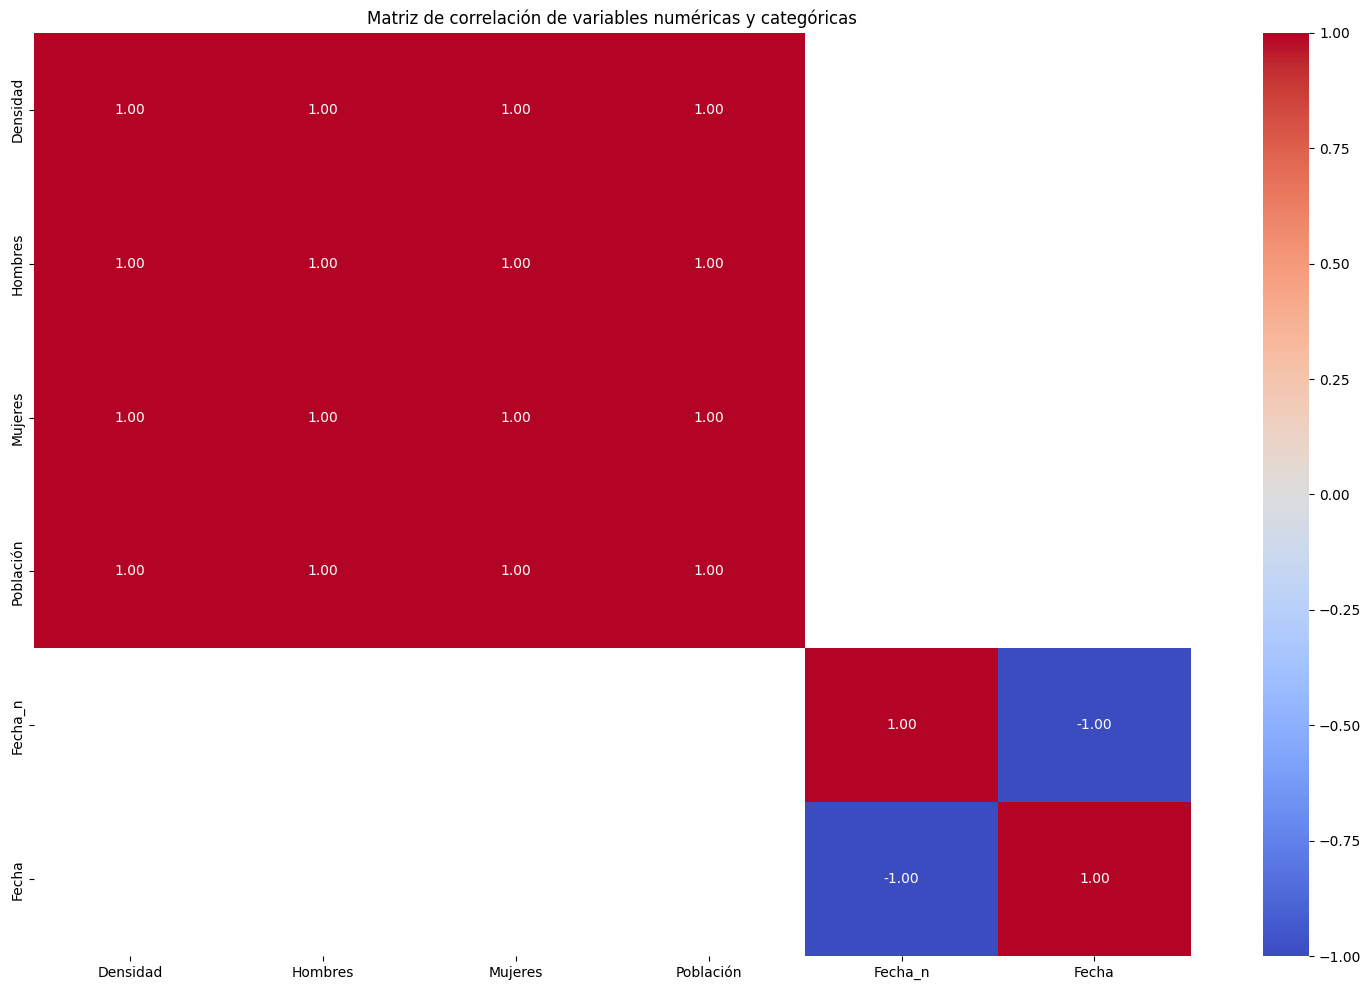

In [30]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["Densidad", "Hombres", "Mujeres", "Población"]
categorical_columns = ["Fecha"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe[numeric_columns].corr()

# Convertir la columna categórica 'Fecha' a numérica
dataframe_copy = dataframe.copy()
dataframe_copy['Fecha_n'] = pd.factorize(dataframe_copy['Fecha'])[0]

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe_copy[['Fecha_n'] + categorical_columns].corr()

# Unir ambas matrices de correlación
corr_matrix_combined = pd.concat([corr_matrix_numeric, corr_matrix_categorical], axis=1)

# Crear un heatmap de correlación para ambas matrices
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_combined, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas y categóricas")
plt.tight_layout()
plt.show()



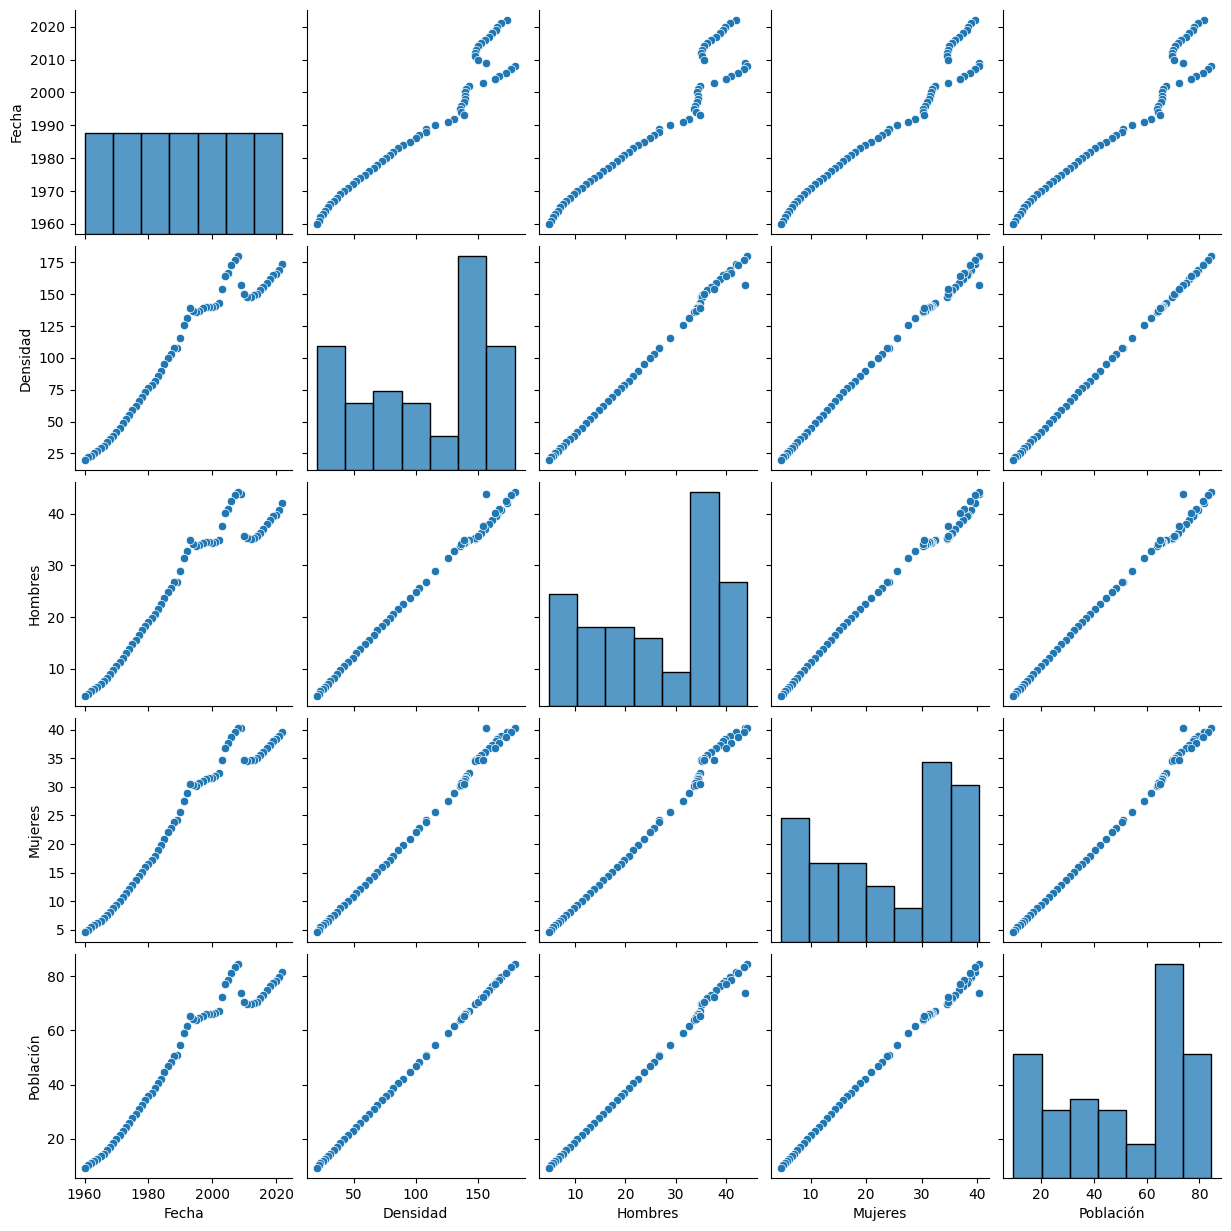

In [31]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [32]:
import plotly.express as px

# Crear el gráfico de dispersión interactivo
fig_scatter = px.scatter(dataframe, x='Densidad', y='Hombres', color='Fecha', size='Población',
                         title='Dispersion entre Densidad, Hombres y Mujeres')

# Reducir el tamaño de los puntos para una mejor visibilidad
fig_scatter.update_traces(marker=dict(size=8), selector=dict(mode='markers'))

# Agregar puntos para la variable 'Mujeres' con el mismo color (rojo) y tamaño reducido
fig_scatter.add_trace(px.scatter(dataframe, x='Densidad', y='Mujeres', color='Fecha', size='Población',
                                  title='Dispersion entre Densidad, Hombres y Mujeres').data[0])

# Mostrar el gráfico
fig_scatter.show()


In [33]:
import plotly.express as px

# Crear el gráfico de barras apiladas con barmode='group'
fig_bar = px.bar(dataframe, x='Fecha', y=['Hombres', 'Mujeres'],
                 color_discrete_sequence=['green', 'purple'],
                 title='Población Hombres y Mujeres por Fecha en Andorra',
                 labels={'value': 'Cantidad', 'variable': 'Género'},
                 height=500,
                 barmode='group')  # Utiliza 'group' para barras al lado de la otra

# Mostrar el gráfico
fig_bar.show()


In [34]:
# Guardar el gráfico como archivo HTML
fig_bar.write_html('poblacion_grafico_barras.html')

In [35]:
import plotly.express as px

# Crear el gráfico de líneas
fig_line = px.line(dataframe, x='Fecha', y=['Hombres', 'Mujeres'],
                   color_discrete_sequence=['green', 'purple'],
                   title='Evolución de la Población de Hombres y Mujeres en Andorra',
                   labels={'value': 'Población', 'variable': 'Género'},
                   height=500)

# Mostrar el gráfico
fig_line.show()


In [36]:
import plotly.io as pio


# Guardar el gráfico como un archivo HTML
pio.write_html(fig_line, file='poblacion_grafico_lineas.html')

---

In [37]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Fecha        0
Densidad     0
Hombres      0
Mujeres      0
Población    0
dtype: int64

In [38]:
#Normalización


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', 'Densidad', 'Hombres', 'Mujeres', 'Población']

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Aplica el escalamiento a las variables seleccionadas
norm_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame normalizado
dataframe_norm.head()


,Fecha,Densidad,Hombres,Mujeres,Población
0,1.704773,1.308987,1.263664,1.305385,1.302689
1,1.649780,1.210602,1.162915,1.236452,1.216667
2,1.594787,1.151571,1.082656,1.191378,1.152977
3,1.539795,1.131894,1.060952,1.173995,1.133200
4,1.484802,1.072863,1.005637,1.115799,1.075964


In [39]:
#Escalado Mínimo-Máximo

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', 'Densidad', 'Hombres', 'Mujeres', 'Población']

# Crea una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplica el escalado Mínimo-Máximo a las variables seleccionadas
scal_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scal_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame escalado
dataframe_scal.head()


,Fecha,Densidad,Hombres,Mujeres,Población
0,1.000000,0.96250,0.944022,0.980636,0.961408
1,0.983871,0.93125,0.912454,0.957932,0.934049
2,0.967742,0.91250,0.887307,0.943086,0.913794
3,0.951613,0.90625,0.880506,0.937361,0.907504
4,0.935484,0.88750,0.863175,0.918194,0.889301


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import joblib


# Supongamos que 'dataframe_scal' es tu DataFrame escalado y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame escalado

# Selecciona las variables para X (características) y y (objetivo)
X = dataframe_scal[['Densidad', 'Hombres', 'Mujeres', 'Población']]
y = dataframe_scal['Fecha']  # Reemplaza 'TuVariableObjetivo' con la variable objetivo real

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guarda los conjuntos de entrenamiento y prueba como archivos CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Crea un modelo (en este caso, un modelo de regresión lineal)
model = LinearRegression()

# Entrena el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Guarda el modelo entrenado
joblib.dump(model, 'modelo_poblacion.joblib')

# Imprime el coeficiente y el intercepto del modelo (si es un modelo de regresión lineal)
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

# Muestra el rendimiento del modelo en el conjunto de prueba
print("Rendimiento del modelo en el conjunto de prueba:", model.score(X_test, y_test))


Coeficientes del modelo: [ 2.96135895 -2.48103259  2.7476501  -2.48823828]
Intercepto del modelo: 0.09104830441406897
Rendimiento del modelo en el conjunto de prueba: 0.9759611636970241


In [41]:
#optimizacion GRID SEARCH

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score
import pandas as pd

# Supongamos que 'dataframe_scal' es tu DataFrame escalado y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame escalado

# Selecciona las variables para X (características) y y (objetivo)
X = dataframe_scal[['Densidad', 'Hombres', 'Mujeres', 'Población']]
y = dataframe_scal['Fecha']  # Reemplaza 'TuVariableObjetivo' con la variable objetivo real

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el modelo
model = LinearRegression()

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    # Puedes agregar más hiperparámetros aquí según sea necesario
}

# Define la métrica de rendimiento que deseas utilizar en la optimización
scorer = make_scorer(r2_score)

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)

# Ajusta el modelo utilizando Grid Search
grid_search.fit(X_train, y_train)

# Obtiene el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
score = best_model.score(X_test, y_test)
print("Rendimiento del mejor modelo en el conjunto de prueba:", score)


Rendimiento del mejor modelo en el conjunto de prueba: 0.9759611636970241
